In [1]:
import prepyto

unetmic: tensorflow is missing, some function will fail
blocks: tensorflow not found, some function will fail


/Users/bzuber/anaconda3/envs/DeepVesicles/lib/python3.9/site-packages/napari/_qt/__init__.py:37: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.7. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


pipeline: tensorflow is not installed, some function will not work.


In [2]:
pl = prepyto.Pipeline("/Users/bzuber/Microscopic Anatomy Dropbox/Benoit Zuber/projects/deepvesicle/data/102_4e_trimmed")

Prepyto Pipeline: the pipeline is created for /Users/bzuber/Microscopic Anatomy Dropbox/Benoit Zuber/projects/deepvesicle/data/102_4e_trimmed


In [3]:
pl.setup_prepyto_dir()
pl.run_deep()
pl.zoom()
pl.label_vesicles()
pl.make_spheres()

Prepyto Pipeline: setting up prepyto directory
Prepyto pipeline: Running unet segmentation if there are less than 7 file in ./deep directory
Prepyto Pipeline: zooming the unet mask
Skipping because a full sized deep mask is already saved on the disk.
If you want to force the program to make a new full sized deep mask, set force_run to True.
Prepyto Pipeline: running label_vesicles
Prepyto Pipeline: restricting labels to segmentation region


finding global threshold on unet mask:   0%|          | 0/20 [00:00<?, ?it/s]

last output array name: deep_mask
last mrc file saved : prepyto/Dummy_102.rec_zoomed_mask.mrc


reorganizing labels after label clean up: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


last output array name: deep_labels
last mrc file saved : prepyto/Dummy_102.rec_deep_labels.mrc
Prepyto Pipeline: Making vesicles spherical.


TypeError: compute_sphere_dataframe() takes from 1 to 2 positional arguments but 3 were given

### Outlier detection
Detect outliers using multivariate statistics on 3 parameters of the detected spheres. We get a list of the most deviating labels (those that have a mahalanobis distance larger than min_mahalanobis_distance). So far the default min_mahalanobis_distance of 2.0 is good. If the red line on the plot does not include enough outliers to your liking, then use a lower value (optional parameter of pl.identify_sphere_outliers).

In [ ]:
pl.sphere_df.hist()

In [ ]:
pl.identify_spheres_outliers(min_mahalanobis_distance=2)

In [ ]:
pl.fix_spheres_interactively()

In [ ]:
pl.visualization_old_new('sphere_labels','mancorr_labels')

In [6]:
pl.compute_sphere_dataframe('mancorr_labels')

fitting sphere to vesicles: 100%|██████████| 90/90 [00:02<00:00, 34.25it/s]


array([[<AxesSubplot:title={'center':'thickness'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'radius'}>,
        <AxesSubplot:title={'center':'mahalanobis'}>]], dtype=object)

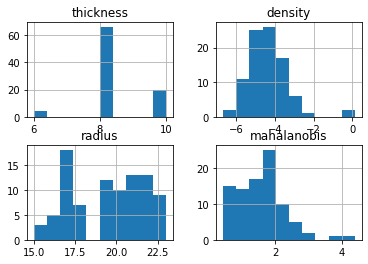

In [7]:
pl.sphere_df.hist()

       thickness   density  radius           center  mahalanobis
label                                                           
88            10 -5.037697      22  [211, 354, 398]     2.076607
28             8 -6.061285      17  [107, 367, 137]     2.080064
9              8 -4.930504      15   [62, 831, 363]     2.097253
87            10 -3.923858      17  [204, 545, 382]     2.099355
81            10 -5.292155      22  [200, 387, 188]     2.182538
89            10 -3.196447      17  [208, 864, 360]     2.195112
26            10 -2.647040      20  [104, 156, 431]     2.196096
55             8 -5.957868      16  [145, 286, 320]     2.305780
14            10 -2.860914      17   [83, 668, 452]     2.312807
16            10 -5.667855      22   [92, 247, 318]     2.378213
51             6 -4.629148      18  [140, 314, 458]     2.446046
24             6 -4.356322      19  [103, 578, 325]     2.454497
7             10 -5.805753      19   [64, 207, 315]     2.464764
60             8 -6.70120

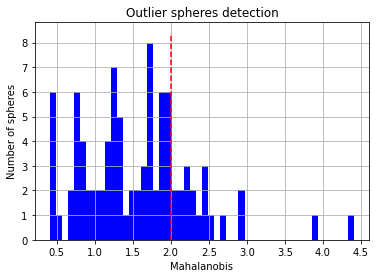

In [8]:
pl.identify_spheres_outliers()

In [9]:
pl.fix_spheres_interactively('mancorr_labels')

last output array name: mancorr_labels
last mrc file saved : prepyto/Dummy_102.rec_mancorr.mrc


In [10]:
pl.compute_sphere_dataframe('mancorr_labels')

fitting sphere to vesicles: 100%|██████████| 90/90 [00:02<00:00, 32.32it/s]


       thickness   density  radius           center  mahalanobis
label                                                           
17            10 -3.760571      22   [89, 676, 373]     2.044289
88            10 -5.037697      22  [211, 354, 398]     2.075853
9              8 -4.930504      15   [62, 831, 363]     2.075870
71             8 -2.658918      17  [168, 838, 434]     2.083092
73            10 -3.407016      18  [176, 707, 384]     2.095814
28             8 -6.061285      17  [107, 367, 137]     2.160959
87            10 -3.923858      17  [204, 545, 382]     2.166846
81            10 -5.292155      22  [200, 387, 188]     2.186120
95             8 -3.031496      23  [108, 723, 337]     2.301953
55             8 -5.957868      16  [145, 286, 320]     2.351856
89            10 -3.196447      17  [208, 864, 360]     2.371099
16            10 -5.667855      22   [92, 247, 318]     2.396402
26            10 -2.647040      20  [104, 156, 431]     2.445564
24             6 -4.35632

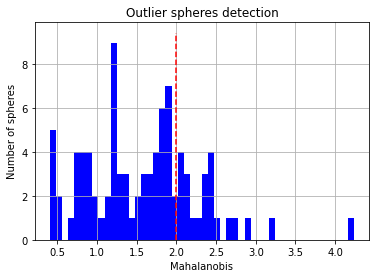

In [11]:
pl.identify_spheres_outliers()

In [12]:
pl.visualization_old_new('sphere_labels','mancorr_labels')

Prepyto Pipeline: visualizing two sets of labels. To continue, close napari window
